#Q4 - Online Shoppers Purchasing Intention Dataset

In [ ]:
!pip install scikit-plot

###Importing Packages

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix,f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

###Loading Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML Lab/online_shoppers_intention.csv")

print("Are there any Null values?",df.isnull().values.any())
print(df.describe())
df.head()

Are there any Null values? False
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%        

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


###Preprocessing

In [4]:
label_encoder = preprocessing.LabelEncoder()
df['Month']= label_encoder.fit_transform(df['Month'])
df['VisitorType']= label_encoder.fit_transform(df['VisitorType'])
df['Weekend']= label_encoder.fit_transform(df['Weekend'])
df['Revenue']= label_encoder.fit_transform(df['Revenue'])

ExitRates                 -0.207071
BounceRates               -0.150673
VisitorType               -0.104726
SpecialDay                -0.082305
OperatingSystems          -0.014668
Region                    -0.011595
TrafficType               -0.005113
Browser                    0.023984
Weekend                    0.029295
Informational_Duration     0.070345
Month                      0.080150
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
ProductRelated_Duration    0.152373
ProductRelated             0.158538
PageValues                 0.492569
Revenue                    1.000000
Name: Revenue, dtype: float64


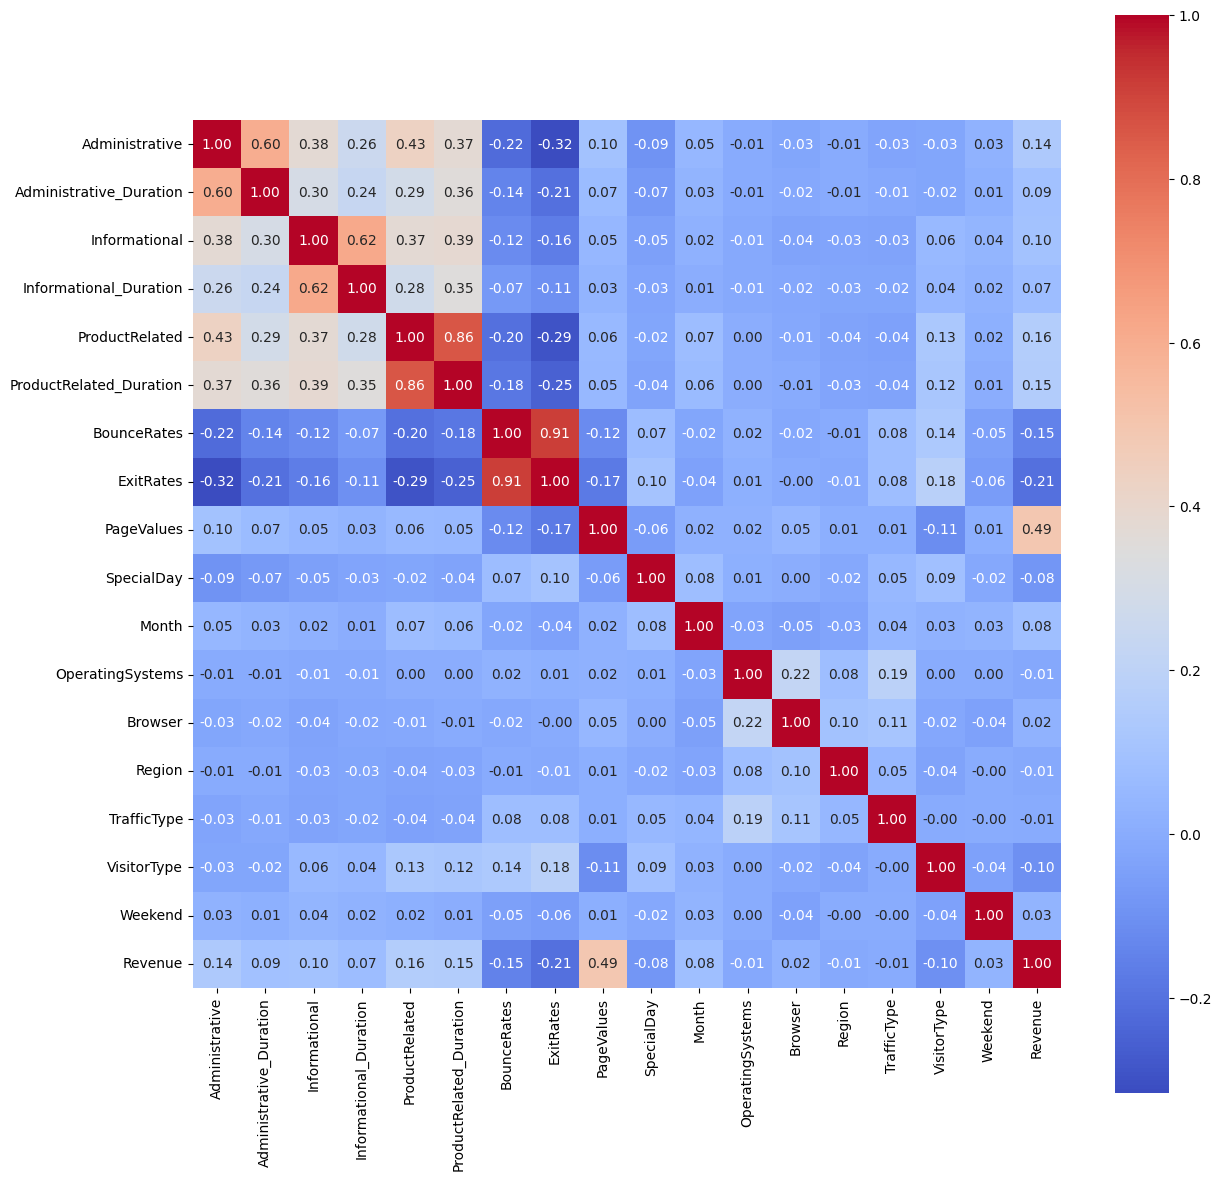

In [5]:
correlation = df.corr()
print(correlation['Revenue'].sort_values())
#the columns above have been chosen after looking at the correlation matrix and finding the most useful features
X = df[["PageValues","ProductRelated","ProductRelated_Duration","Administrative"]]
y = df["Revenue"]
plt.figure(figsize=(14, 14))
sns.heatmap(correlation,annot=True,fmt = ".2f",cmap = "coolwarm",cbar = True,square = True)
plt.show()

###Training and Prediction

####Logistic Regression

Accuracy score: 0.8673965936739659
Precision: 0.71875
Recall: 0.3357664233576642


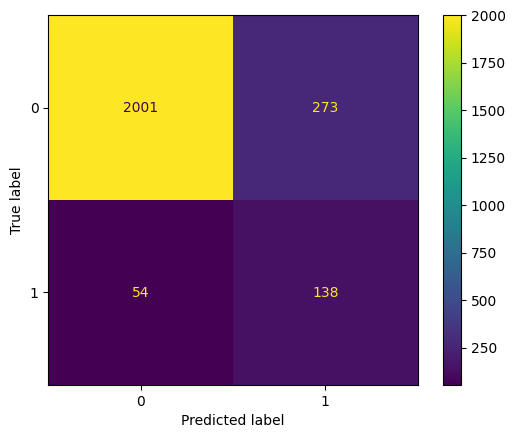

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

conf_mat_lr = confusion_matrix(y_pred,y_test)
#Overall Accuracy
accuracy_lr = model_lr.score(X_test,y_test)
print("Accuracy score:",accuracy_lr)
#Precision
print("Precision:",precision_score(y_test, y_pred))
#Recall
print("Recall:",recall_score(y_test, y_pred))
conf_plot = ConfusionMatrixDisplay(confusion_matrix = conf_mat_lr, display_labels = [0, 1])
conf_plot.plot()
plt.show()

####PLA

Accuracy score: 0.8811841038118411
Precision: 0.6666666666666666
Recall: 0.5742092457420924


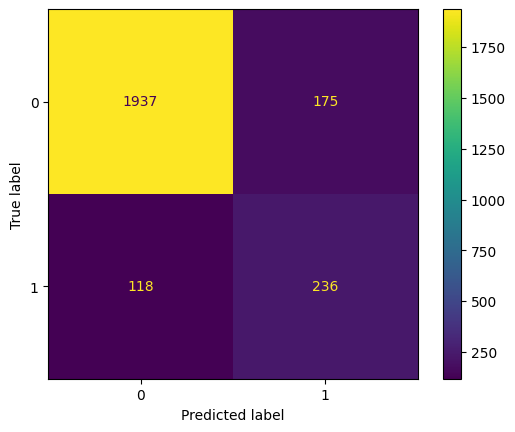

In [7]:
class Perceptron:
    def __init__(self, num_features, learning_rate=0.04, max_epochs=50):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

    def train(self, X, y):
        for _ in range(self.max_epochs):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                update = self.learning_rate * (yi - prediction)
                self.weights += update * xi
                self.bias += update

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model_per = Perceptron(num_features=X_train.shape[1])
model_per.train(X_train.values, y_train.values)
y_pred = model_per.predict(X_test.values)

accuracy_pla = accuracy_score(y_pred, y_test)
conf_mat = confusion_matrix(y_pred,y_test)
#Accuracy
print("Accuracy score:",accuracy_pla)
#Precision
print("Precision:",precision_score(y_test, y_pred))
#Recall
print("Recall:",recall_score(y_test, y_pred))

conf_plot = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])
conf_plot.plot()
plt.show()

####MLP

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
input_dim = X_train.shape[1]
output_dim = 1

model_mlp = Sequential([
    Dense(64, input_dim=input_dim, activation='tanh'),
    Dense(32, input_dim=input_dim, activation='tanh'),
    Dense(output_dim, activation='sigmoid')
])

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_mlp.fit(X_train.values, y_train.values, epochs=5, batch_size=32, validation_split=0.2)
loss, accuracy_mlp = model_mlp.evaluate(X_test.values, y_test.values)
#Accuracy
print("Accuracy score:", accuracy_mlp)
#Precision
print("Precision:",precision_score(y_test, y_pred))
#Recall
print("Recall:",recall_score(y_test, y_pred))

Epoch 1/5
247/247 [==============================] - 8s 9ms/step - loss: 0.3517 - accuracy: 0.8714 - val_loss: 0.3232 - val_accuracy: 0.8885
Epoch 2/5
247/247 [==============================] - 1s 4ms/step - loss: 0.3241 - accuracy: 0.8837 - val_loss: 0.3234 - val_accuracy: 0.8961
Epoch 3/5
247/247 [==============================] - 1s 4ms/step - loss: 0.3075 - accuracy: 0.8842 - val_loss: 0.2997 - val_accuracy: 0.8951
Epoch 4/5
247/247 [==============================] - 1s 4ms/step - loss: 0.3139 - accuracy: 0.8840 - val_loss: 0.2980 - val_accuracy: 0.8966
Epoch 5/5
78/78 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8820
Accuracy score: 0.8819951415061951
Precision: 0.6666666666666666
Recall: 0.5742092457420924


####KNN

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Accuracy score:
Precision: 0.7659574468085106
Recall: 0.35036496350364965


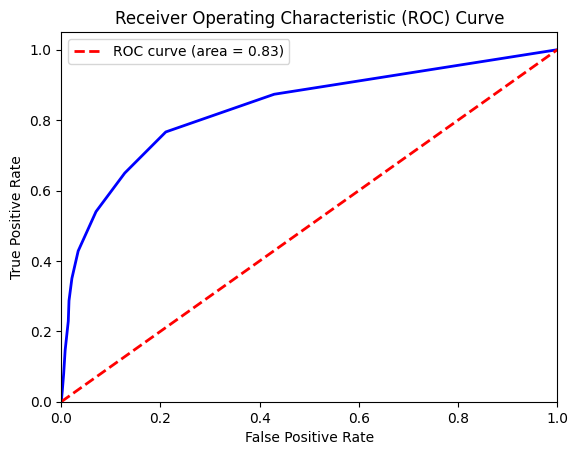

In [12]:
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_pred,y_test)
#Accuracy
print("Accuracy score:",)
#Precision
print("Precision:",precision_score(y_test, y_pred))
#Recall
print("Recall:",recall_score(y_test, y_pred))

y_pred_proba = model_knn.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr, tpr, color='blue', lw=2)
x = [0, 1]
y1 = [0, 1]
plt.plot(x,y1,color='red', label='ROC curve (area = %0.2f)' % auc,lw=2, linestyle='--')
plt.legend()
plt.show()

####SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model_svm = SVC(kernel = 'linear')
model_svm.fit(X_train,y_train)
y_pred_svm = model_svm.predict(X_test)

conf_mat_svm = confusion_matrix(y_test,y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
#Accuracy

print("Accuracy score:",accuracy_svm)
#Precision
print("Precision:",precision_score(y_test, y_pred))
#Recall
print("Recall:",recall_score(y_test, y_pred))

In [ ]:
conf_plot = ConfusionMatrixDisplay(confusion_matrix = conf_mat_svm, display_labels = [0, 1])
conf_plot.plot()
plt.show()

In [ ]:
auc = roc_auc_score(y_test.values, y_pred_svm)
fpr, tpr, _ = roc_curve(y_test.values, y_pred_svm)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='blue', lw=2)
x = [0, 1]
y1 = [0, 1]
plt.plot(x, y1, color='red', label='ROC curve (area = %0.2f)' % auc,lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

####Naive Bayes

In [13]:
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_pred_nb, y_test)
conf_mat_nb = confusion_matrix(y_test,y_pred_nb)
#Accuracy
print("Accuracy score:", accuracy_nb)
#Precision
print("Precision:",precision_score(y_test, y_pred))
#Recall
print("Recall:",recall_score(y_test, y_pred))

Accuracy score: 0.8625304136253041
Precision: 0.7659574468085106
Recall: 0.35036496350364965


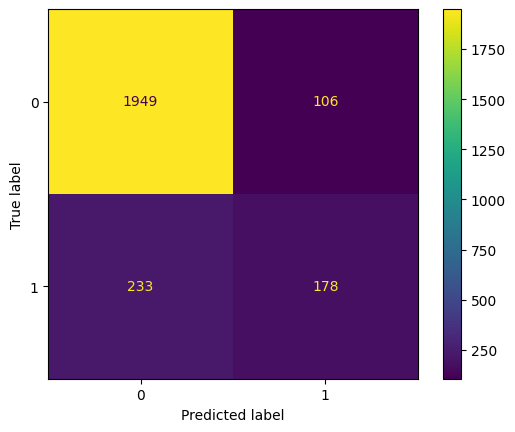

In [14]:
conf_plot = ConfusionMatrixDisplay(confusion_matrix = conf_mat_nb, display_labels = [0, 1])
conf_plot.plot()
plt.show()

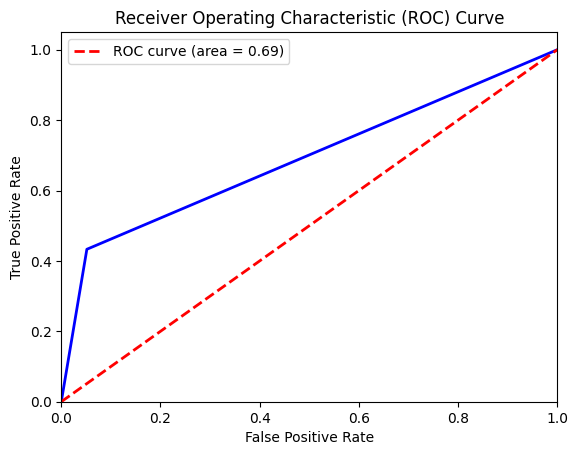

In [15]:
auc = roc_auc_score(y_test.values, y_pred_nb)
fpr, tpr, _ = roc_curve(y_test.values, y_pred_nb)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='blue', lw=2)
x = [0, 1]
y1 = [0, 1]
plt.plot(x, y1, color='red', label='ROC curve (area = %0.2f)' % auc,lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()
plt.show()

###Results

In [16]:
print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of PLA:", accuracy_pla)
print("Accuracy of MLP:", accuracy_mlp)
print("Accuracy of KNN:", accuracy_knn)
print("Accuracy of SVM:", accuracy_svm)
print("Accuracy of Naive Bayes:", accuracy_nb)

Accuracy of Logistic Regression: 0.8673965936739659
Accuracy of PLA: 0.8811841038118411
Accuracy of MLP: 0.8819951415061951
Accuracy of KNN: 0.8738848337388483
Accuracy of Naive Bayes: 0.8625304136253041


#####Therefore it can be seen that Multi Layer Perceptron is the best performing model with an accuracy of 88.19% for the given dataset with PLA coming a close second with an accuracy of 88.11%. There does not seem to be any overfitting when it comes to the models that have been tested above.

###Clustering

In [17]:
wcss = []
for i in range(1, 15):
    model_kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    model_kmeans.fit(df)
    wcss.append(model_kmeans.inertia_)

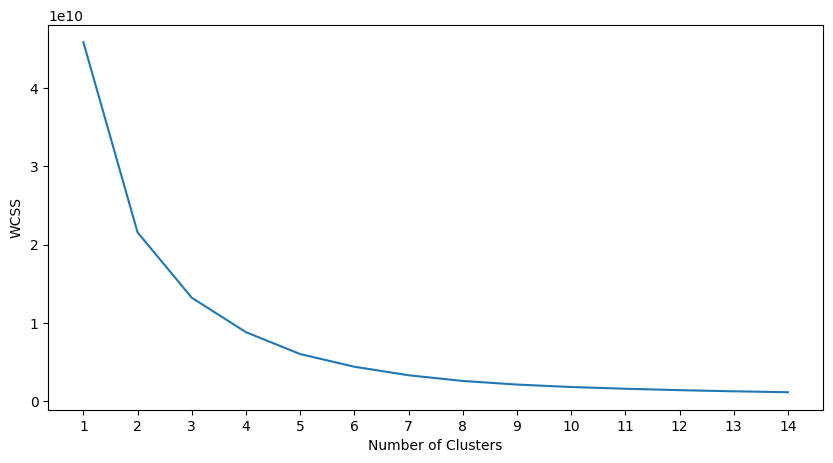

In [18]:
plt.figure(figsize=(10,5))
x_axis = [i for i in range(1,15)]
plt.xticks(range(1,15))
plt.plot(x_axis,wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#####Therefore it can be seen that n = 3, ie 3 clusters would be ideal for this dataset.